In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import warnings
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,recall_score, confusion_matrix
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE, ADASYN
warnings.filterwarnings('ignore')
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_selection import SelectKBest, chi2


In [ ]:
df = pd.read_csv("/content/Bengali hate speech .csv")
df.head()

,sentence,hate,category
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1,sports
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,sports
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1,sports
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,sports
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1,sports


In [ ]:
df.drop(columns=['category'], inplace=True)

In [ ]:
df

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী!!!!!,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এটা...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচ।তুর মার হেডায় খেলবে সাকিব,1
...,...,...
29995,আমার মনে হচ্ছে মেনে নেয়া উচিত,0
29996,আমি ধন্যবাদ জানাই আইনপসাসনকে,0
29997,কাসমির কাসমিরই নিজশ্যই সাদিন হওয়ার দরকার,0
29998,কলমি পিলিজ আপু মনি অনেক কিওট লাগছে,0


In [ ]:
def punctuations_remover(my_str):
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰🤣⚽️✌�￰৷￰'''
    no_punct = " "
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char
    no_punct = no_punct.replace("\n",' ')
    return no_punct
df.sentence = df.sentence.apply(lambda x: punctuations_remover(x))

In [ ]:
# Define function for text cleaning
def text_cleaner(text):
    # Remove non-Bengali characters and punctuation
    cleaned_text = re.sub(r'[^\u0980-\u09FF\s]', '', text)
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    return cleaned_text

# Apply text cleaning
df['sentence'] = df['sentence'].apply(text_cleaner)

In [ ]:
df

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এট...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1
...,...,...
29995,আমার মনে হচ্ছে মেনে নেয়া উচিত,0
29996,আমি ধন্যবাদ জানাই আইনপসাসনকে,0
29997,কাসমির কাসমিরই নিজশ্যই সাদিন হওয়ার দরকার,0
29998,কলমি পিলিজ আপু মনি অনেক কিওট লাগছে,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['hate'] = encoder.fit_transform(df['hate'])
df

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এট...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1
...,...,...
29995,আমার মনে হচ্ছে মেনে নেয়া উচিত,0
29996,আমি ধন্যবাদ জানাই আইনপসাসনকে,0
29997,কাসমির কাসমিরই নিজশ্যই সাদিন হওয়ার দরকার,0
29998,কলমি পিলিজ আপু মনি অনেক কিওট লাগছে,0


In [ ]:
df.head()

,sentence,hate
0,যত্তসব পাপন শালার ফাজলামী,1
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এট...,1
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1


In [ ]:
######### foreign language removing #######
def for_lan_re(text):
    text = "".join(i for i in text if i in [".","।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
    sentence = re.sub(' +', ' ', text)
    return sentence
df.sentence = df.sentence.apply(lambda x: for_lan_re(x))

In [ ]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F700-\U0001F77F"
                               u"\U0001F780-\U0001F7FF"
                               u"\U0001F800-\U0001F8FF"
                               u"\U0001F900-\U0001F9FF"
                               u"\U0001FA00-\U0001FA6F"
                               u"\U0001FA70-\U0001FAFF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Apply the remove_emojis function to the 'Text' column
df['sentence'] = df['sentence'].apply(remove_emojis)

# Display the modified DataFrame
print("\nDataFrame after removing emojis:")

df.sample(10)


DataFrame after removing emojis:


,sentence,hate
10617,রংপুর এর দর্শকরা কই গেলা হাত তুলো আর তাসকিন ক...,0
13508,বাংলা নতুন গান শুনতে পেলাম প্রচুর পরিমাণ,0
2239,এই মেয়ে তো খারাপ মানি একটা খানকি,1
27927,কত্তার বাচ্চা,0
17156,আমরা সবাই কে ফাঁসি চাই,0
10491,জিতবে এইবার চট্টগ্রাম দেখবে সারা গ্রাম ভালবাস...,0
9103,তোদের মত আবাল মার্কা ইউটুবারদের জন্যই এরা সেল...,1
4846,মাগি বলে বিছার ছায় শুনে হাসি পাইতেছে আমার খান...,1
21052,আল্লাহ আপনাকে নেক হায়াত দান করুকযেন এরকম ভন্ড...,0
13136,কত সুন্দর সামাজিক ছবি বেশি বেশি র দশকের ছবি আ...,0


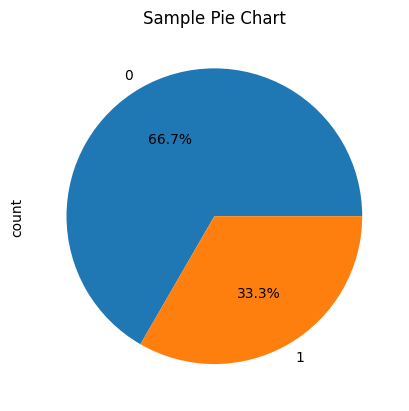

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
value_counts = df['hate'].value_counts()

# Plot a pie chart
value_counts.plot.pie(autopct='%.1f%%')

# Add a title
plt.title("Sample Pie Chart")

# Show the plot
plt.savefig("Imbalanced Dataset.jpeg", dpi = 250)
plt.show()

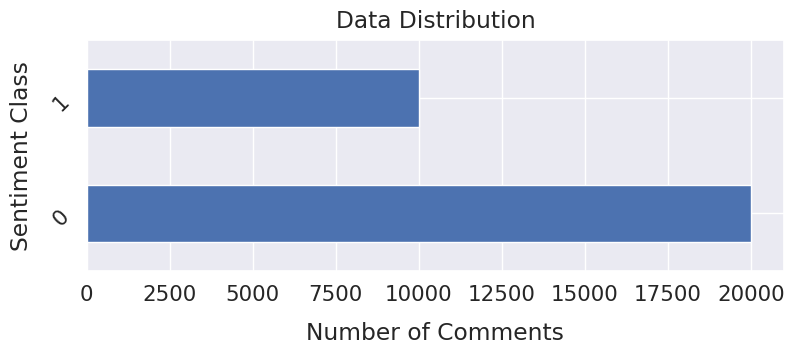

In [ ]:
sns.set(font_scale=1.4)
df['hate'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Data Distribution", y=1.02);

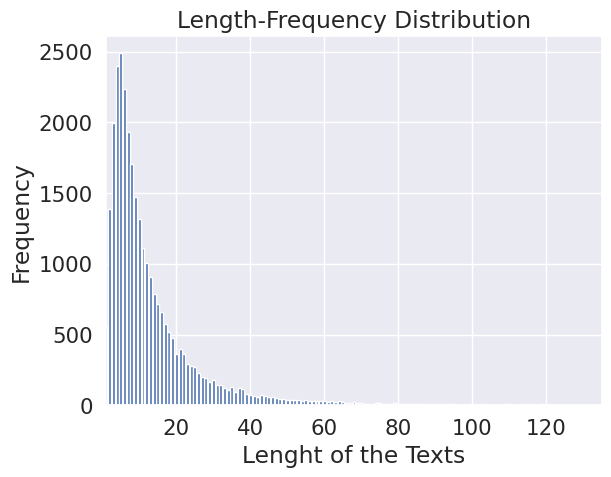

Maximum Length of a review: 534
Minimum Length of a review: 0
Average Length of a reviews: 14.0


In [ ]:
# Calculate the Review of each of the Review
df['ReviewLength'] = df.sentence.apply(lambda x:len(x.split()))
frequency = dict()
for i in df.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()
print(f"Maximum Length of a review: {max(df.ReviewLength)}")
print(f"Minimum Length of a review: {min(df.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(df.ReviewLength),0)}")

In [ ]:
df.shape

(30000, 3)

In [ ]:
# count the number of samples in each class
class_counts = df['hate'].value_counts()
print(class_counts)

hate
0    20000
1    10000
Name: count, dtype: int64


In [ ]:
# identify the class with the least samples
min_class = class_counts.idxmin()
max_class = class_counts.idxmax()
# calculate the number of samples required to balance the classes
upsample_size = class_counts[max_class] - class_counts[min_class]
print(upsample_size)
## applying upsampling.
# upsample the minority class to balance the classes
# It samples the data from the data frame with replacement, meaning that it can choose the same sample multiple times.
df_minority_upsampled = df[df['hate'] == min_class].sample(n=upsample_size, replace=True, random_state=42)
df_upsampled = pd.concat([df, df_minority_upsampled])
# shuffle the samples in the balanced dataset
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
# save the balanced dataset to a file

10000


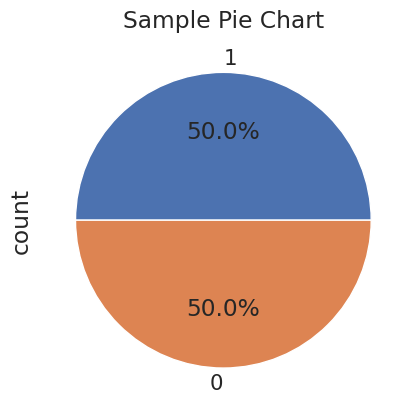

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
value_counts = df_upsampled['hate'].value_counts()

# Plot a pie chart
value_counts.plot.pie(autopct='%.1f%%')

# Add a title
plt.title("Sample Pie Chart")

# Show the plot
plt.savefig("Balanced Dataset.jpeg", dpi = 250)
plt.show()

In [ ]:
df.head()

,sentence,hate,ReviewLength
0,যত্তসব পাপন শালার ফাজলামী,1,4
1,পাপন শালা রে রিমান্ডে নেওয়া দরকার,1,6
2,জিল্লুর রহমান স্যারের ছেলে এতো বড় জারজ হবে এট...,1,19
3,শালা লুচ্চা দেখতে পাঠার মত দেখা যায়,1,7
4,তুই তো শালা গাজা খাইছচতুর মার হেডায় খেলবে সাকিব,1,9


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
import string

# Make sure to download the required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def transform_text(text):
    text = text.lower()  # Convert to lowercase
    tokens = nltk.word_tokenize(text)
    cleaned_tokens = []
    for token in tokens:
        token = re.sub(r'\W+', '', token)  # Remove non-alphanumeric characters
        if token and token not in stop_words and token not in punctuations:
            cleaned_tokens.append(token)
    return " ".join(cleaned_tokens)

# Apply the transform_text function to the 'sentence' column
df['transformed_text'] = df['sentence'].apply(transform_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming df is already defined and contains 'transformed_text' and 'hate' columns
# df = pd.read_csv('your_data.csv') # Example of loading data

# Split data into features and target variable
X = df['transformed_text']
y = df['hate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different TF-IDF parameters
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Train Logistic Regression model
lrc = LogisticRegression(solver='liblinear', penalty='l1')
lrc.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_lrc = lrc.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_lrc)
precision = precision_score(y_test, y_pred_lrc)
recall = recall_score(y_test, y_pred_lrc)
f1 = f1_score(y_test, y_pred_lrc)
conf_matrix_lrc = confusion_matrix(y_test, y_pred_lrc)

print("Logistic Regression")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_lrc)
print("---------------------------------------")


Logistic Regression
Accuracy: 87.65%
Precision: 88.37%
Recall: 72.53%
F1 Score: 79.67%
Confusion Matrix:
[[3807  191]
 [ 550 1452]]
---------------------------------------


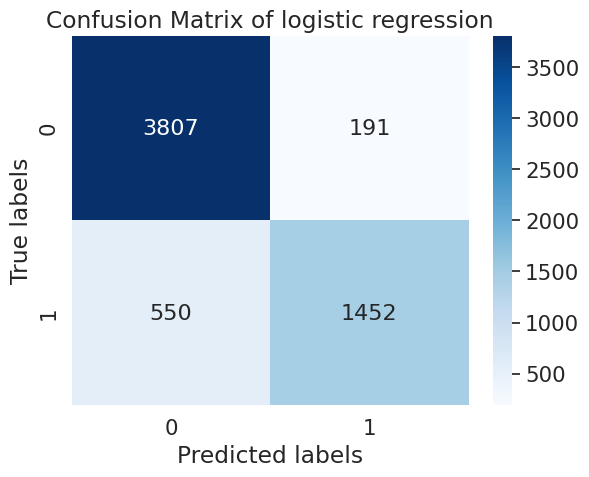

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix_lrc, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix of logistic regression')
plt.show()

Random Forest model
Accuracy: 86.77%
Precision: 84.44%
Recall: 73.98%
F1 Score: 78.86%
Confusion Matrix:
[[3725  273]
 [ 521 1481]]
---------------------------------------


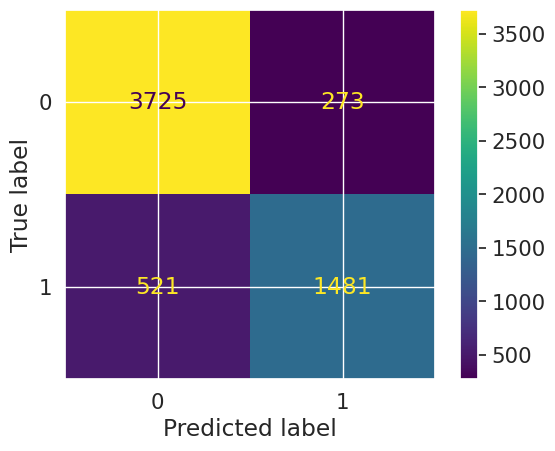

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame
# Split data into features and target variable
X = df['transformed_text']
y = df['hate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different TF-IDF parameters
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print("Random Forest model")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_rf)
print("---------------------------------------")

# Optional: Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf).plot()



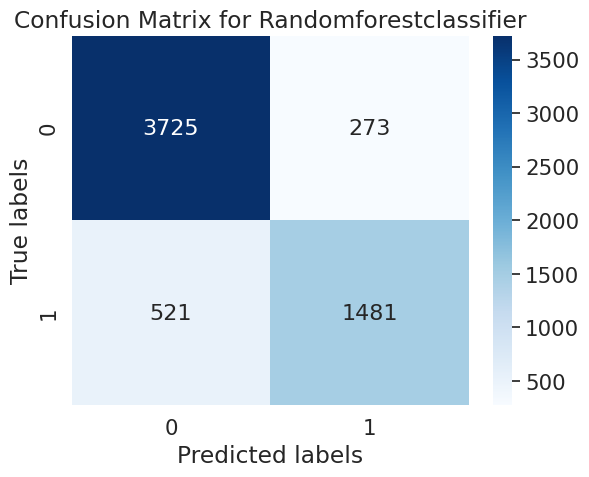

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Randomforestclassifier')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train_tfidf, y_train)
y_pred_gb = gb.predict(X_test_tfidf)

# Evaluation
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
recall_score = recall_score(y_test, y_pred_gb)
f1_score = f1_score(y_test, y_pred_gb)

print("Classifier: Gradient Boosting")
print(f"Accuracy: {accuracy*100:.2f}%")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall_score: {recall_score*100:.2f}%")
print(f"f1_score: {f1_score*100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("---------------------------------------")


Classifier: Gradient Boosting
Accuracy: 82.83%
Precision: 90.30%
Recall_score: 54.40%
f1_score: 67.89%
Confusion Matrix:
[[3881  117]
 [ 913 1089]]
---------------------------------------


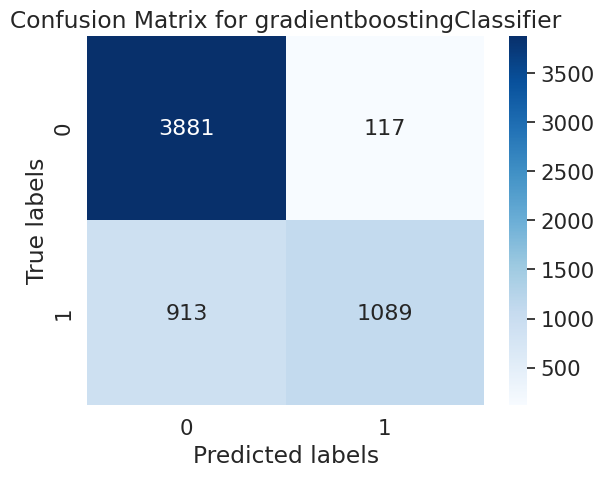

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for gradientboostingClassifier')
plt.show()

SVM model
Accuracy: 87.27%
Precision: 87.61%
Recall: 72.03%
F1 Score: 79.06%
Confusion Matrix:
[[3794  204]
 [ 560 1442]]
---------------------------------------


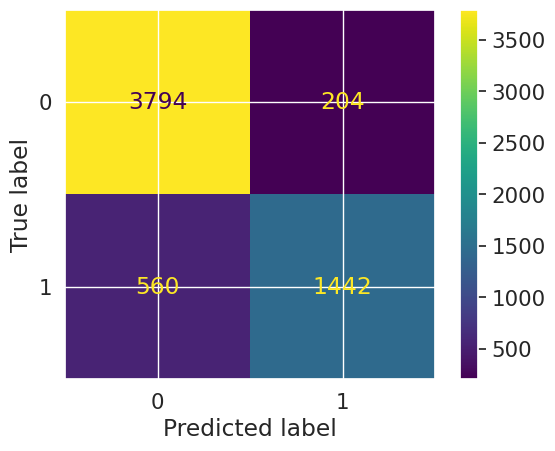

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming df is your DataFrame
# Split data into features and target variable
X = df['transformed_text']
y = df['hate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Experiment with different TF-IDF parameters
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Train SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
y_pred_svm = svm.predict(X_test_tfidf)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print("SVM model")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1 Score: {f1 * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_svm)
print("---------------------------------------")

# Optional: Display the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm).plot()


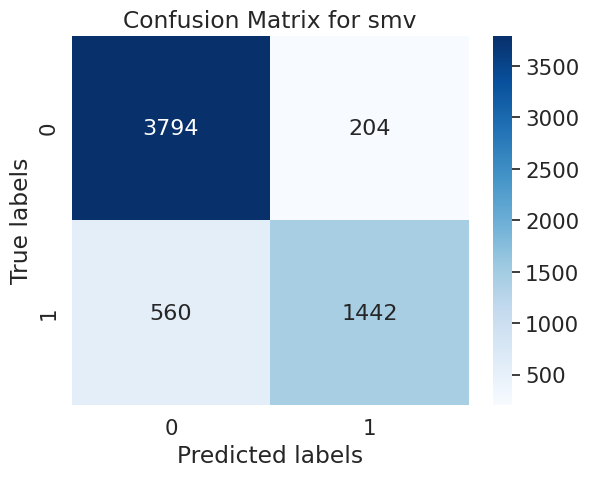

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})

# Add labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for smv')
plt.show()

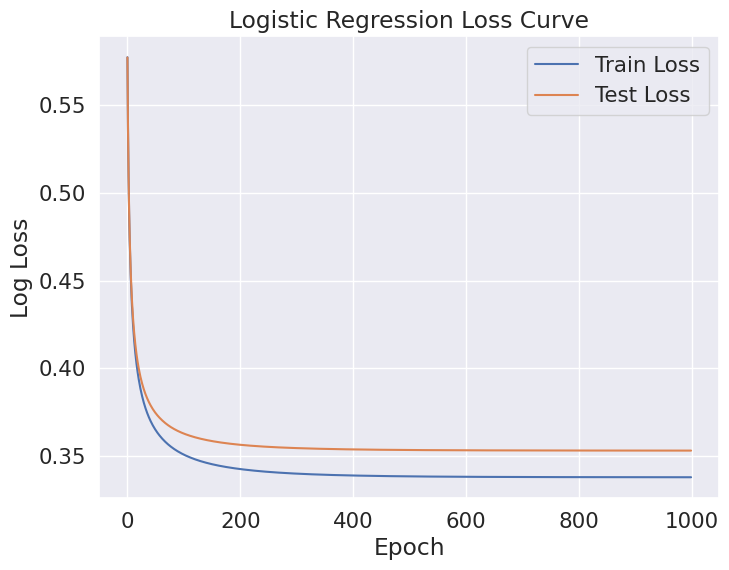

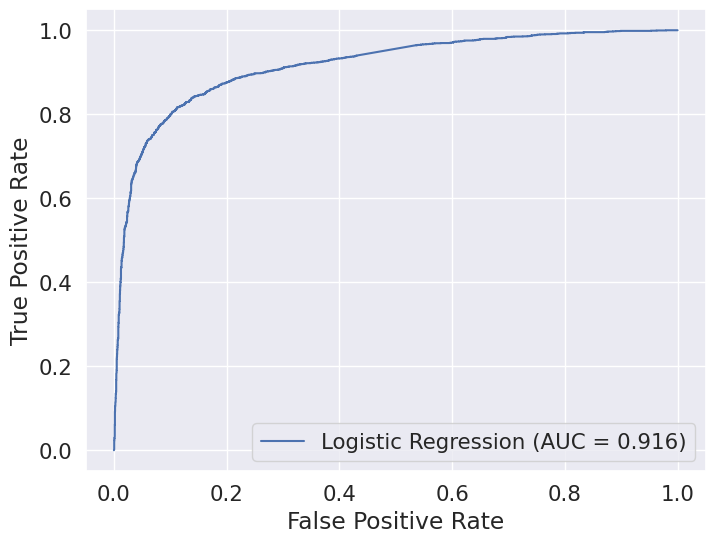

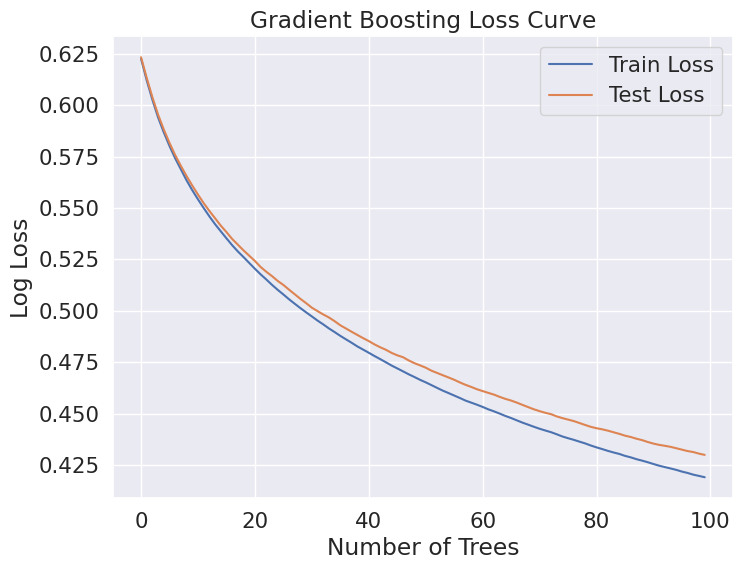

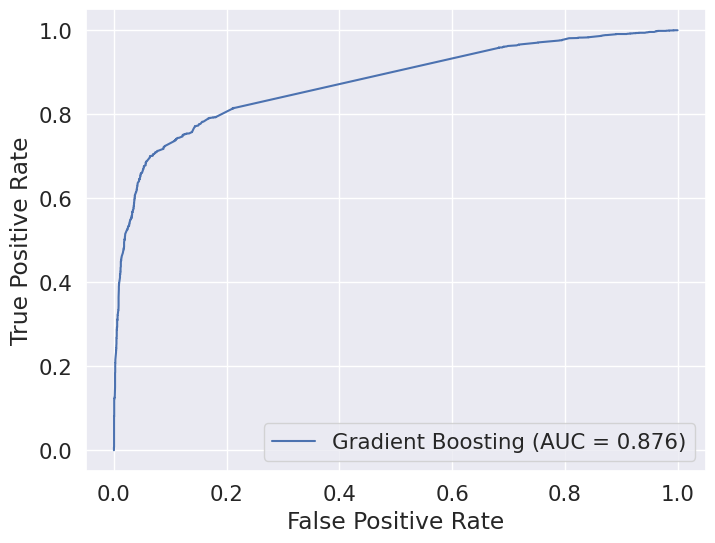

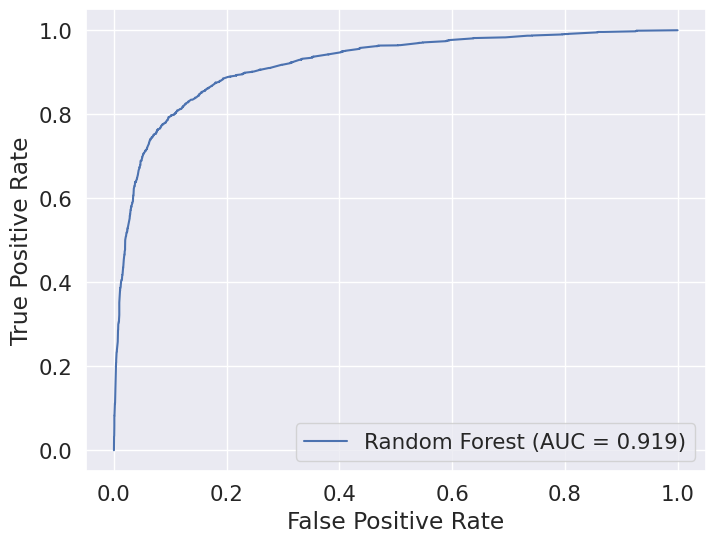

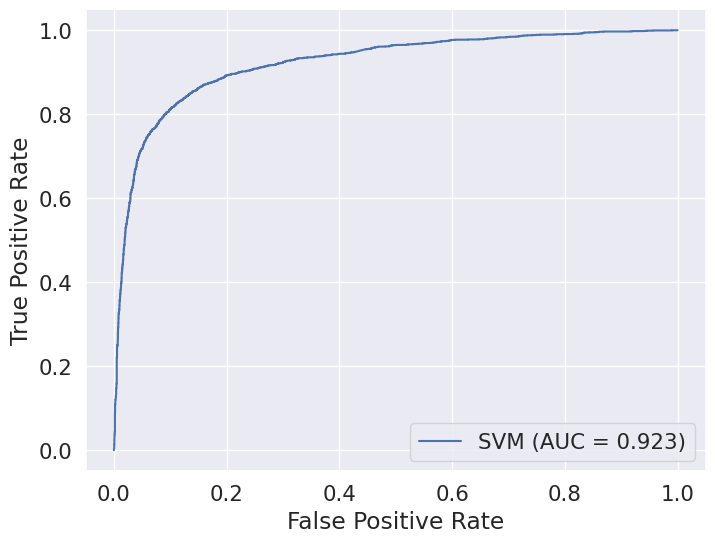

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming df is already defined and contains the required columns
# Split data into features and target variable
X = df['transformed_text']
y = df['hate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), min_df=2)
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

# Logistic Regression using SGD
logreg_sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='constant', eta0=0.01, random_state=42)
n_epochs = 1000
train_losses_logreg = []
test_losses_logreg = []

for _ in range(n_epochs):
    logreg_sgd.partial_fit(X_train_tfidf, y_train, classes=np.unique(y_train))
    train_loss = log_loss(y_train, logreg_sgd.predict_proba(X_train_tfidf))
    test_loss = log_loss(y_test, logreg_sgd.predict_proba(X_test_tfidf))
    train_losses_logreg.append(train_loss)
    test_losses_logreg.append(test_loss)

# Plot loss curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(train_losses_logreg, label='Train Loss')
plt.plot(test_losses_logreg, label='Test Loss')
plt.title('Logistic Regression Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Calculate ROC curve and AUC for Logistic Regression
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logreg_sgd.predict_proba(X_test_tfidf)[:, 1])
auc_logistic = auc(logistic_fpr, logistic_tpr)

# Plot ROC curve for Logistic Regression
plt.figure(figsize=(8, 6))
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label=f'Logistic Regression (AUC = {auc_logistic:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train_tfidf, y_train)

# Calculate loss curve for Gradient Boosting
gb_train_losses = []
gb_test_losses = []

for y_prob in gb.staged_predict_proba(X_train_tfidf):
    gb_train_losses.append(log_loss(y_train, y_prob))
for y_prob in gb.staged_predict_proba(X_test_tfidf):
    gb_test_losses.append(log_loss(y_test, y_prob))

# Plot loss curve for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(gb_train_losses, label='Train Loss')
plt.plot(gb_test_losses, label='Test Loss')
plt.title('Gradient Boosting Loss Curve')
plt.xlabel('Number of Trees')
plt.ylabel('Log Loss')
plt.legend()
plt.show()

# Calculate ROC curve and AUC for Gradient Boosting
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb.predict_proba(X_test_tfidf)[:, 1])
auc_gb = auc(gb_fpr, gb_tpr)

# Plot ROC curve for Gradient Boosting
plt.figure(figsize=(8, 6))
plt.plot(gb_fpr, gb_tpr, linestyle='-', label=f'Gradient Boosting (AUC = {auc_gb:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)

# Calculate ROC curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf.predict_proba(X_test_tfidf)[:, 1])
auc_rf = auc(rf_fpr, rf_tpr)

# Plot ROC curve for Random Forest
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, linestyle='-', label=f'Random Forest (AUC = {auc_rf:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# SVM (SMV)
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Calculate ROC curve and AUC for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm.decision_function(X_test_tfidf))
auc_svm = auc(svm_fpr, svm_tpr)

# Plot ROC curve for SVM
plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, linestyle='-', label=f'SVM (AUC = {auc_svm:.3f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()